<a href="https://colab.research.google.com/github/sakshitiwari1234/DataScience_Projects/blob/main/Health_monitoring_and_analyis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Health Monitoring And Analysis._

helath analysis is used to evaluate the status of health of indvidual using variou fators in health dataset over time.  

the data i will be using in this will consist the following informtation about user patient.
PatientID: Numerical identifier for the patient.

Age: Age of the patient in years.

Gender: Gender of the patient.

HeartRate: Heart rate in beats per minute.

BloodPressure: Blood pressure readings, formatted inconsistently.

RespiratoryRate: Respiratory rate in breaths per minute.

BodyTemperature: Body temperature in Fahrenheit.

ActivityLevel: Activity level at the time of the measurement.

OxygenSaturation: Oxygen saturation percentage.

SleepQuality: Quality of sleep reported by the patient.

StressLevel: Reported level of stress.

Timestamp: Date and time of the measurement.

In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv("/content/healthmonitoring.csv")

In [4]:
data

,PatientID,Age,Gender,HeartRate,BloodPressure,RespiratoryRate,BodyTemperature,ActivityLevel,OxygenSaturation,SleepQuality,StressLevel,Timestamp
0,1,69,Male,60.993428,130/85,15,98.885236,resting,95.0,excellent,low,2024-04-26 17:28:55.286711
1,2,32,Male,98.723471,120/80,23,98.281883,walking,97.0,good,high,2024-04-26 17:23:55.286722
2,3,78,Female,82.295377,130/85,13,98.820286,resting,98.0,fair,high,2024-04-26 17:18:55.286726
3,4,38,Female,80.000000,111/78,19,98.412594,running,98.0,poor,moderate,2024-04-26 17:13:55.286728
4,5,41,Male,87.531693,120/80,14,99.369871,resting,98.0,good,low,2024-04-26 17:08:55.286731
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,61,Male,85.077820,135/76,22,98.243780,walking,NaN,poor,moderate,2024-04-25 00:13:55.288556
496,497,62,Female,99.925508,130/85,14,98.859537,running,97.0,excellent,moderate,2024-04-25 00:08:55.288558
497,498,49,Female,98.619323,120/80,16,98.228169,running,99.0,good,moderate,2024-04-25 00:03:55.288560
498,499,62,Male,99.248763,130/85,14,97.185764,resting,NaN,poor,low,2024-04-24 23:58:55.288562


The dataset includes health metrics from 500 individuals, featuring variables such as age, gender, heart rate, blood pressure, respiratory rate, body temperature, and oxygen saturation, recorded over a specific period. These variables provide a comprehensive snapshot of each patient’s health status, which is crucial for monitoring and managing various health conditions.

# Problem

looking on the various health factors and relationship between them we catrgorize and look for the more repsonsive apporoach towards unspervised learning to identify natural grouping with health data and precised health management.

first i shall look the first five patients data.

In [5]:
data.head()

,PatientID,Age,Gender,HeartRate,BloodPressure,RespiratoryRate,BodyTemperature,ActivityLevel,OxygenSaturation,SleepQuality,StressLevel,Timestamp
0,1,69,Male,60.993428,130/85,15,98.885236,resting,95.0,excellent,low,2024-04-26 17:28:55.286711
1,2,32,Male,98.723471,120/80,23,98.281883,walking,97.0,good,high,2024-04-26 17:23:55.286722
2,3,78,Female,82.295377,130/85,13,98.820286,resting,98.0,fair,high,2024-04-26 17:18:55.286726
3,4,38,Female,80.000000,111/78,19,98.412594,running,98.0,poor,moderate,2024-04-26 17:13:55.286728
4,5,41,Male,87.531693,120/80,14,99.369871,resting,98.0,good,low,2024-04-26 17:08:55.286731


checking if there is any null value or not.

In [6]:
data.isnull()

,PatientID,Age,Gender,HeartRate,BloodPressure,RespiratoryRate,BodyTemperature,ActivityLevel,OxygenSaturation,SleepQuality,StressLevel,Timestamp
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,True,False,False,False
496,False,False,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,True,False,False,False


In [7]:
data.isnull().sum()

PatientID             0
Age                   0
Gender                0
HeartRate             0
BloodPressure         0
RespiratoryRate       0
BodyTemperature      18
ActivityLevel         0
OxygenSaturation    163
SleepQuality          0
StressLevel           0
Timestamp             0
dtype: int64

In [8]:
data.loc[16]

PatientID                                   17
Age                                         75
Gender                                    Male
HeartRate                            75.974338
BloodPressure                           122/85
RespiratoryRate                             20
BodyTemperature                      98.200183
ActivityLevel                          walking
OxygenSaturation                           NaN
SleepQuality                              fair
StressLevel                           moderate
Timestamp           2024-04-26 16:08:55.286763
Name: 16, dtype: object

In [9]:
data.loc[163]

PatientID                                  164
Age                                         49
Gender                                  Female
HeartRate                            94.358635
BloodPressure                           120/80
RespiratoryRate                             22
BodyTemperature                      98.891315
ActivityLevel                          resting
OxygenSaturation                           NaN
SleepQuality                              fair
StressLevel                                low
Timestamp           2024-04-26 03:53:55.287152
Name: 163, dtype: object

since there are some null values , so we need to handle this using filling or replacing it.

In [10]:
#calculating median of body tempreature
median_body_temp = data['BodyTemperature'].median()
# caclulating medain of oxygen saturation column.
median_oxygen_saturation = data['OxygenSaturation'].median()

In [11]:
median_body_temp
# median_oxygen_saturation

98.60916660783991

In [12]:
median_oxygen_saturation

96.0

now filling the missing values using median of both the columns

In [13]:
newdata = data['BodyTemperature'].fillna(median_body_temp)

In [14]:
newdata = data['OxygenSaturation'].fillna(median_oxygen_saturation)

In [15]:
newdata

0      95.0
1      97.0
2      98.0
3      98.0
4      98.0
       ... 
495    96.0
496    97.0
497    99.0
498    96.0
499    94.0
Name: OxygenSaturation, Length: 500, dtype: float64

In [16]:
data.loc[163]

PatientID                                  164
Age                                         49
Gender                                  Female
HeartRate                            94.358635
BloodPressure                           120/80
RespiratoryRate                             22
BodyTemperature                      98.891315
ActivityLevel                          resting
OxygenSaturation                           NaN
SleepQuality                              fair
StressLevel                                low
Timestamp           2024-04-26 03:53:55.287152
Name: 163, dtype: object

In [17]:
data.isnull().sum()

PatientID             0
Age                   0
Gender                0
HeartRate             0
BloodPressure         0
RespiratoryRate       0
BodyTemperature      18
ActivityLevel         0
OxygenSaturation    163
SleepQuality          0
StressLevel           0
Timestamp             0
dtype: int64

In [18]:
#calculating median of body tempreatur
mode_Body_temp = data['BodyTemperature'].mode()
# caclulating medain of oxygen saturation column.
mode_oxygen_saturation = data['OxygenSaturation'].mode()

In [19]:
mode_Body_temp


0      97.094895
1      97.138220
2      97.185764
3      97.344427
4      97.357966
         ...    
477    99.467138
478    99.467521
479    99.469084
480    99.475359
481    99.489150
Name: BodyTemperature, Length: 482, dtype: float64

In [20]:
mode_oxygen_saturation

0    94.0
Name: OxygenSaturation, dtype: float64

In [21]:
data['BodyTemperature'].fillna(mode_Body_temp, inplace= True )

In [22]:
data['OxygenSaturation'].fillna(mode_oxygen_saturation, inplace= True)

In [23]:
data

,PatientID,Age,Gender,HeartRate,BloodPressure,RespiratoryRate,BodyTemperature,ActivityLevel,OxygenSaturation,SleepQuality,StressLevel,Timestamp
0,1,69,Male,60.993428,130/85,15,98.885236,resting,95.0,excellent,low,2024-04-26 17:28:55.286711
1,2,32,Male,98.723471,120/80,23,98.281883,walking,97.0,good,high,2024-04-26 17:23:55.286722
2,3,78,Female,82.295377,130/85,13,98.820286,resting,98.0,fair,high,2024-04-26 17:18:55.286726
3,4,38,Female,80.000000,111/78,19,98.412594,running,98.0,poor,moderate,2024-04-26 17:13:55.286728
4,5,41,Male,87.531693,120/80,14,99.369871,resting,98.0,good,low,2024-04-26 17:08:55.286731
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,61,Male,85.077820,135/76,22,98.243780,walking,NaN,poor,moderate,2024-04-25 00:13:55.288556
496,497,62,Female,99.925508,130/85,14,98.859537,running,97.0,excellent,moderate,2024-04-25 00:08:55.288558
497,498,49,Female,98.619323,120/80,16,98.228169,running,99.0,good,moderate,2024-04-25 00:03:55.288560
498,499,62,Male,99.248763,130/85,14,97.185764,resting,NaN,poor,low,2024-04-24 23:58:55.288562


In [24]:
data.isnull().sum()

PatientID             0
Age                   0
Gender                0
HeartRate             0
BloodPressure         0
RespiratoryRate       0
BodyTemperature       0
ActivityLevel         0
OxygenSaturation    163
SleepQuality          0
StressLevel           0
Timestamp             0
dtype: int64

now , we will examine summary statistics of all of this and distribution of the health metrics (age, heartrate , body_temp , oxygen_saturation)

it will help us to better understand the data and also better visulaizations and spread of the dat a


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")

In [28]:
# summary statistics

summary = data.describe()

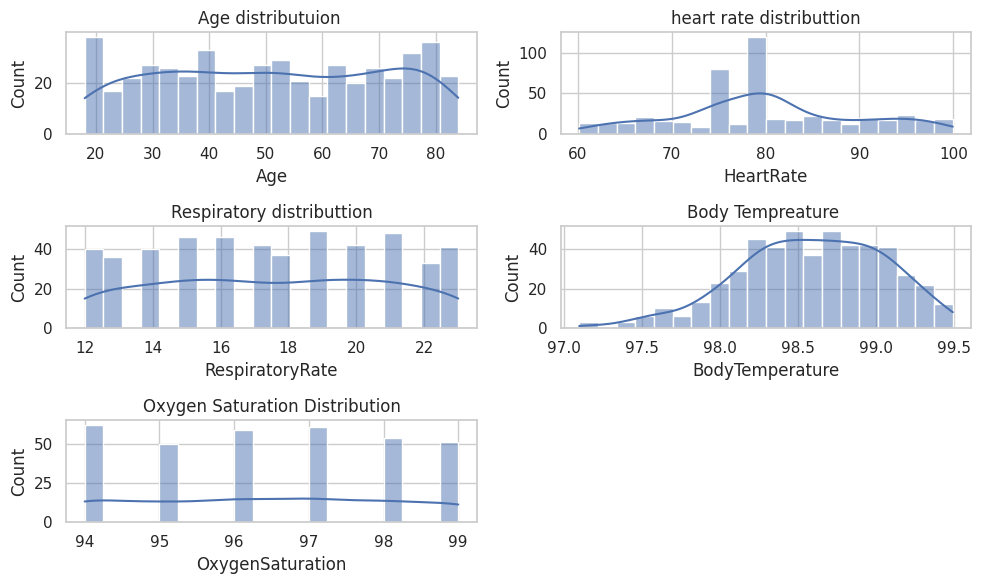

In [29]:
# plotting distrubutions of numercial features.

fig , axes = plt.subplots(3,2,figsize = (10,6))

sns.histplot(data['Age'], bins =20 , kde =True ,ax=axes[0,0] )
axes[0,0].set_title('Age distributuion ')

sns.histplot(data['HeartRate'], bins = 20 , kde = True , ax= axes[0,1])
axes[0,1].set_title("heart rate distributtion")

sns.histplot(data['RespiratoryRate'], bins = 20 , kde = True , ax= axes[1,0])
axes[1,0].set_title("Respiratory distributtion")

sns.histplot(data['BodyTemperature'], bins = 20 , kde = True , ax= axes[1,1])
axes[1,1].set_title("Body Tempreature ")

sns.histplot(data['OxygenSaturation'], bins = 20 , kde = True , ax= axes[2,0])
axes[2, 0].set_title("Oxygen Saturation Distribution")

# to remove the unused subplots

fig.delaxes(axes[2,1])

plt.tight_layout()
plt.show()


In [31]:
# # to remove the unused subplots

# fig.delaxes(axes[2,1])

# plt.tight_layout()
# plt.show()

now lets have a f=gende distribution in data and correlation between different columns in the dataset.

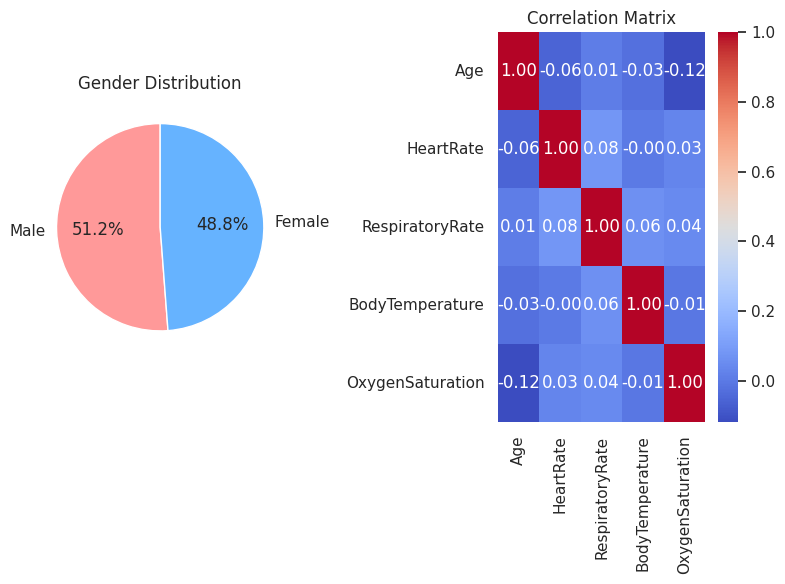

In [62]:
# gender Distribution
gender_counts = data['Gender'].value_counts()

# correlation Matrix for numerical health metrics
correlation_matrix = data[['Age', 'HeartRate', 'RespiratoryRate', 'BodyTemperature', 'OxygenSaturation']].corr()

# plotting the findings
fig, axes = plt.subplots(1, 2, figsize=(8,6))

# gender distribution plot
gender_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axes[0].set_ylabel('')
axes[0].set_title('Gender Distribution')

# correlation matrix plot
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

The pie chart indicates a nearly even split between male and female subjects in the dataset, with males comprising a slight majority at 51.2%. The correlation matrix shows no strong correlations between the variables, as all the values are close to zero. Specifically, none of the health metrics (Age, Heart Rate, Respiratory Rate, Body Temperature, and Oxygen Saturation) display a strong positive or negative linear relationship with one another in this particular dataset

###Now, i am analyzing at the heart rate by activity level:

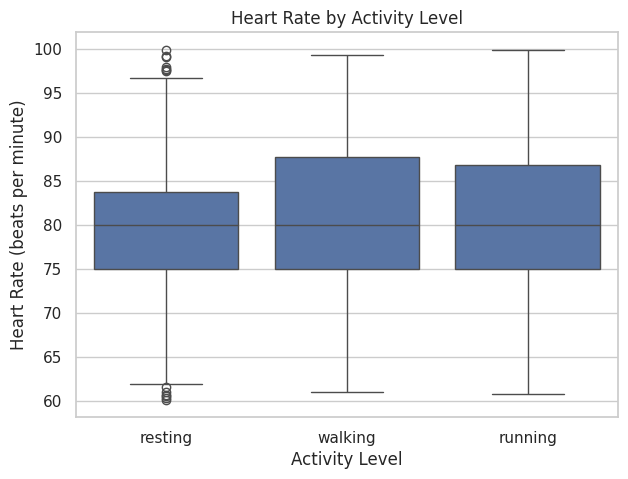

In [59]:
# heart Rate by activity level
plt.figure(figsize=(7,5))
sns.boxplot(x='ActivityLevel', y='HeartRate', data=data)
plt.title('Heart Rate by Activity Level')
plt.ylabel('Heart Rate (beats per minute)')
plt.xlabel('Activity Level')
plt.show()

## distribution of blood pressure levels and some health metrics by gender:

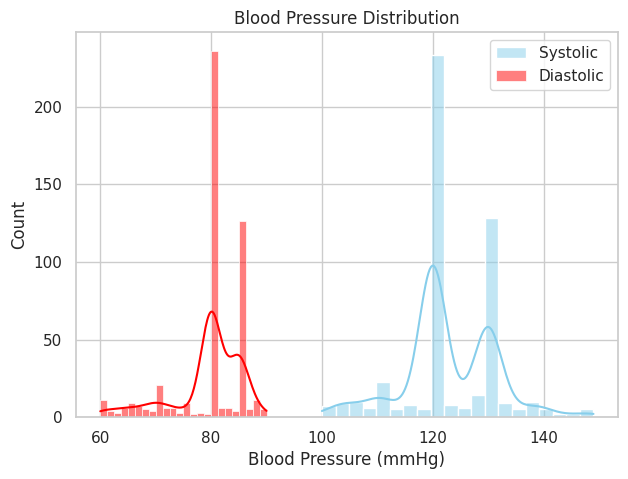

In [58]:
# extracting systolic and diastolic blood pressure for analysis
data[['SystolicBP', 'DiastolicBP']] = data['BloodPressure'].str.split('/', expand=True).astype(int)

# blood pressure distribution
plt.figure(figsize=(7,5))
sns.histplot(data['SystolicBP'], color="skyblue", label="Systolic", kde=True)
sns.histplot(data['DiastolicBP'], color="red", label="Diastolic", kde=True)
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure (mmHg)')
plt.legend()
plt.show()

#

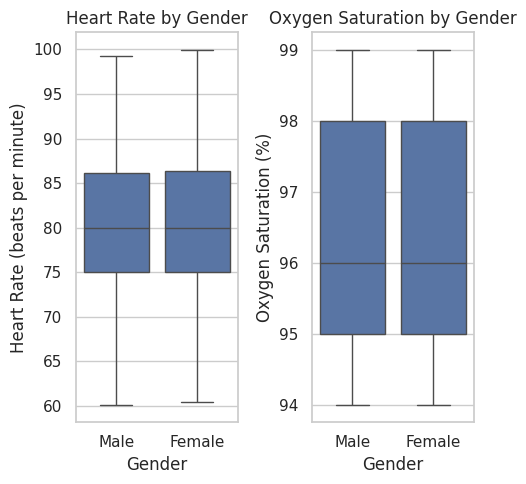

In [54]:
#  health metrics by gender
fig, axes = plt.subplots(1, 2, figsize=(5,5))
sns.boxplot(x='Gender', y='HeartRate', data=data, ax=axes[0])
axes[0].set_title('Heart Rate by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Heart Rate (beats per minute)')

sns.boxplot(x='Gender', y='OxygenSaturation', data=data, ax=axes[1])
axes[1].set_title('Oxygen Saturation by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Oxygen Saturation (%)')

plt.tight_layout()
plt.show()

### The systolic blood pressure, represented in blue, shows a more spread-out distribution with peaks suggesting common readings around 120 mmHg and 140 mmHg. The diastolic blood pressure, in red, appears to have a narrower distribution, with a significant peak around 80 mmHg. The spread of systolic values is broader than the diastolic ones, which is typical as systolic pressure tends to vary more with factors like activity level and stress. This distribution is consistent with general population trends where a systolic reading of around 120 mmHg and a diastolic reading of around 80 mmHg are considered normal.

For heart rate, both males and females show similar median values with a relatively similar interquartile range, indicating no significant difference in heart rate between genders within this dataset. In terms of oxygen saturation, again, both genders exhibit nearly identical medians and interquartile ranges, suggesting that oxygen saturation does not differ notably between males and females in this sample. There are a few outliers in oxygen saturation for both genders, indicating a few individuals with lower than typical values, but these do not seem to affect the overall distribution significantly.

### Now, analyzing  heart rate and oxygen saturation by sleep quality and stress levels:

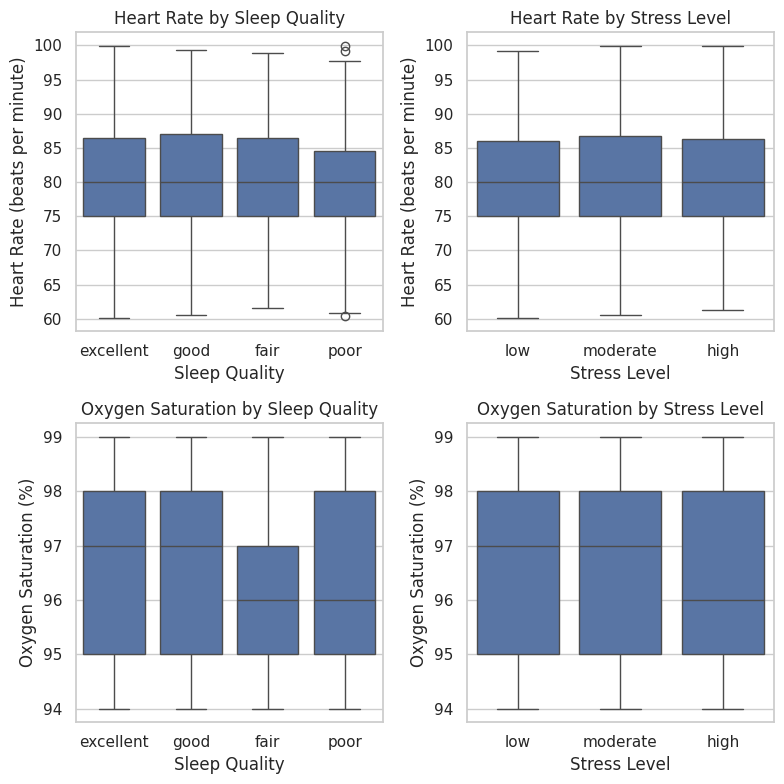

In [53]:
# categorizing sleep quality and stress level for better analysis
sleep_quality_order = ['excellent', 'good', 'fair', 'poor']
stress_level_order = ['low', 'moderate', 'high']

# creating plots to examine relationships
fig, axes = plt.subplots(2, 2, figsize=(8,8))

# heart rate by sleep quality
sns.boxplot(x='SleepQuality', y='HeartRate', data=data, order=sleep_quality_order, ax=axes[0, 0])
axes[0, 0].set_title('Heart Rate by Sleep Quality')
axes[0, 0].set_xlabel('Sleep Quality')
axes[0, 0].set_ylabel('Heart Rate (beats per minute)')

# heart rate by stress level
sns.boxplot(x='StressLevel', y='HeartRate', data=data, order=stress_level_order, ax=axes[0, 1])
axes[0, 1].set_title('Heart Rate by Stress Level')
axes[0, 1].set_xlabel('Stress Level')
axes[0, 1].set_ylabel('Heart Rate (beats per minute)')

# oxygen saturation by sleep quality
sns.boxplot(x='SleepQuality', y='OxygenSaturation', data=data, order=sleep_quality_order, ax=axes[1, 0])
axes[1, 0].set_title('Oxygen Saturation by Sleep Quality')
axes[1, 0].set_xlabel('Sleep Quality')
axes[1, 0].set_ylabel('Oxygen Saturation (%)')

# oxygen saturation by stress level
sns.boxplot(x='StressLevel', y='OxygenSaturation', data=data, order=stress_level_order, ax=axes[1, 1])
axes[1, 1].set_title('Oxygen Saturation by Stress Level')
axes[1, 1].set_xlabel('Stress Level')
axes[1, 1].set_ylabel('Oxygen Saturation (%)')

plt.tight_layout()
plt.show()



###  analyzing  the respiratory rate and body temperature by activity levels:

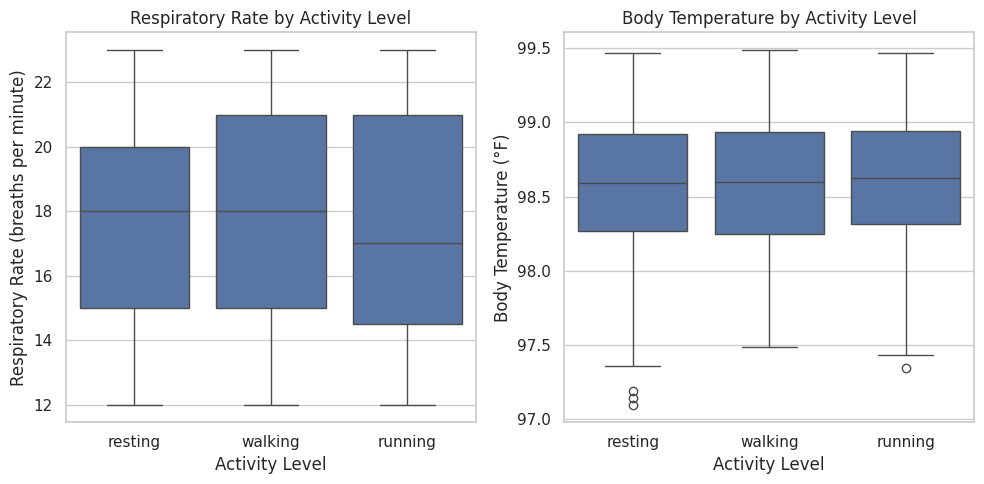

In [49]:
# creating plots to examine relationships between activity level and other health metrics
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# respiratory rate by activity level
sns.boxplot(x='ActivityLevel', y='RespiratoryRate', data=data, ax=axes[0])
axes[0].set_title('Respiratory Rate by Activity Level')
axes[0].set_xlabel('Activity Level')
axes[0].set_ylabel('Respiratory Rate (breaths per minute)')

# body temperature by activity level
sns.boxplot(x='ActivityLevel', y='BodyTemperature', data=data, ax=axes[1])
axes[1].set_title('Body Temperature by Activity Level')
axes[1].set_xlabel('Activity Level')
axes[1].set_ylabel('Body Temperature (°F)')

plt.tight_layout()
plt.show()

conclusion - The respiratory rate tends to increase with activity level, as indicated by higher median rates for walking and running compared to resting. It aligns with physiological responses to exercise, where the breathing rate increases to meet oxygen demands. For body temperature, there is a slight upward trend from resting to running, which is consistent with the body heating up during physical exertion.

### GROUPING THE PATIENTS ACCORDINGLY

I am grouping the patiients on the basis of following factors.

Age Group: Young, Middle-aged, Senior

Blood Pressure Category: Normal, Elevated, Hypertension Stage 1, Hypertension Stage 2

Heart Rate Category: Low, Normal, High

Oxygen Saturation Category: Normal, Low


In [45]:
# function to categorize Age
def age_group(age):
    if age <= 35:
        return 'Young'
    elif age <= 55:
        return 'Middle-aged'
    else:
        return 'Senior'

# function to categorize Blood Pressure
def bp_category(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Elevated'
    elif 140 <= systolic < 160 or 90 <= diastolic < 100:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

# function to categorize Heart Rate
def hr_category(hr):
    if hr < 60:
        return 'Low'
    elif hr <= 100:
        return 'Normal'
    else:
        return 'High'

# function to categorize Oxygen Saturation
def oxy_category(oxy):
    if oxy < 94:
        return 'Low'
    else:
        return 'Normal'

# applying categorizations
data['AgeGroup'] = data['Age'].apply(age_group)
data['BPCategory'] = data.apply(lambda x: bp_category(x['SystolicBP'], x['DiastolicBP']), axis=1)
data['HRCategory'] = data['HeartRate'].apply(hr_category)
data['OxyCategory'] = data['OxygenSaturation'].apply(oxy_category)

print(data[['Age', 'AgeGroup', 'SystolicBP', 'DiastolicBP', 'BPCategory', 'HeartRate', 'HRCategory', 'OxygenSaturation', 'OxyCategory']].head())

   Age     AgeGroup  SystolicBP  DiastolicBP BPCategory  HeartRate HRCategory  \
0   69       Senior         130           85   Elevated  60.993428     Normal   
1   32        Young         120           80   Elevated  98.723471     Normal   
2   78       Senior         130           85   Elevated  82.295377     Normal   
3   38  Middle-aged         111           78     Normal  80.000000     Normal   
4   41  Middle-aged         120           80   Elevated  87.531693     Normal   

   OxygenSaturation OxyCategory  
0              95.0      Normal  
1              97.0      Normal  
2              98.0      Normal  
3              98.0      Normal  
4              98.0      Normal  


### Visualizing the Groups

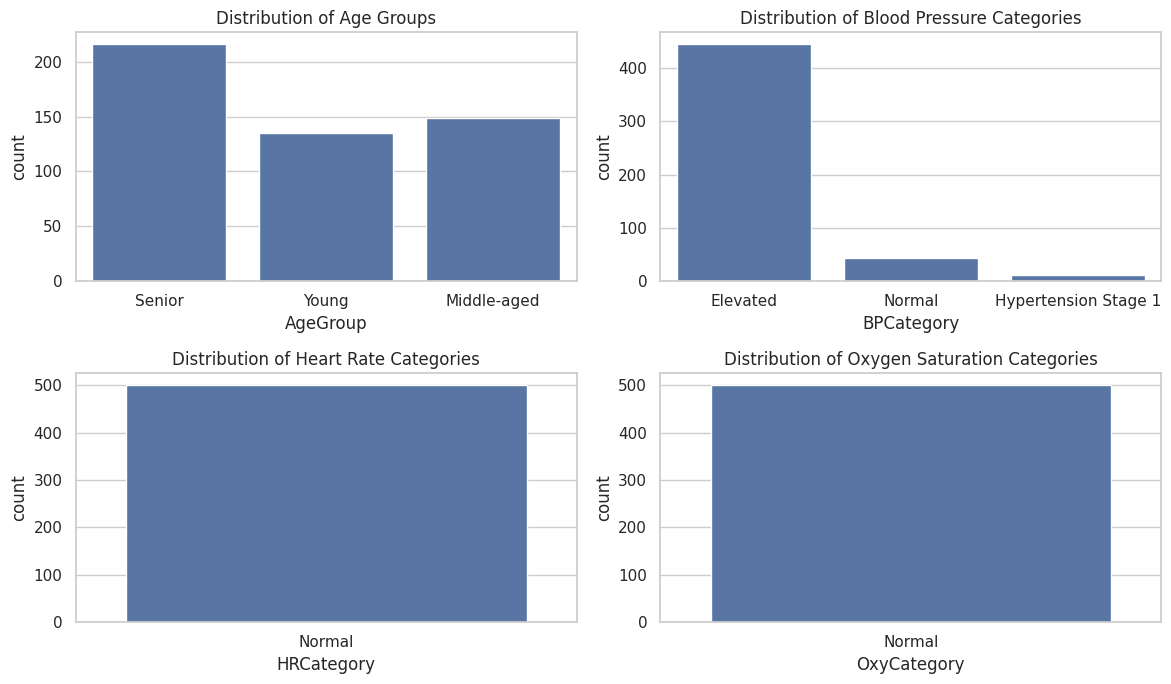

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(12,7))

# Age Group count plot
sns.countplot(x='AgeGroup', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age Groups')

# Blood Pressure Category count plot
sns.countplot(x='BPCategory', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Blood Pressure Categories')

# Heart Rate Category count plot
sns.countplot(x='HRCategory', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Heart Rate Categories')

# Oxygen Saturation Category count plot
sns.countplot(x='OxyCategory', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Oxygen Saturation Categories')

# Show the plots
plt.tight_layout()
plt.show()

### OBSERVATIONS ---

Distribution of Age Groups: The count plot shows that the ‘Senior’ category has the highest count, followed by the ‘Young’ and ‘Middle-aged’ categories. It suggests that seniors are the largest age group in this dataset.

Distribution of Blood Pressure Categories: The majority of the dataset falls under ‘Normal’ blood pressure, with fewer instances in the ‘Elevated’ and ‘Hypertension Stage 1’. ‘Hypertension Stage 2’ has the lowest count, indicating that severe hypertension is less common among the participants.

Distribution of Heart Rate Categories: Most individuals have a ‘Normal’ heart rate, with very few falling into the ‘Low’ or ‘High’ categories. It indicates that most individuals in this dataset have a heart rate that falls within the expected range.

Distribution of Oxygen Saturation Categories: Almost everyone has ‘Normal’ oxygen saturation levels, with very few instances of ‘Low’ saturation. It suggests that oxygen deprivation is not a common issue in this group.